# Introdução - estatística bayesiana

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Frequentista vs Bayesiano

Em cursos clássicos de estatística, a abordagem mais utilizada de estatística é a chamada frequentista. <br>
A estatística frequentista utiliza a noção de que a probabilidade de um evento acontecer é a frequência com a qual ele acontece numa sequência "infinita". <br>
Por exemplo, se jogarmos um dado não viciado "muitas vezes" vamos chegar a conclusão, de acordo com esse paradigma, que a probabilidade de qualquer face cair é o número de vezes em que essa face caiu dividido pelo total: $P(x = i) = \frac{X_i}{\text{nº de jogadas}}$, em que $X_i = \text{nº de vezes que a face i caiu}$. Numa sequência infinita, isso tende a $P(i) = \frac{1}{6}$, ou seja, $$P(i) = \lim_{n \to \infty} \frac{X_i}{\sum_{i=1}^{6} X_i} = \frac{1}{6}$$ <br>
Podemos ilustrar isso no seguinte código:<br>
Aqui a ideia é que a probabilidade de cada uma das faces está determinada em $\frac{1}{6}$. Quando aumentamos o número de observações da nossa amostra, a probabilidade observada converge para o valor real. No valor real todas as faces são igualmente prováveis.

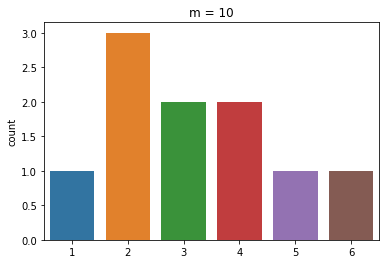

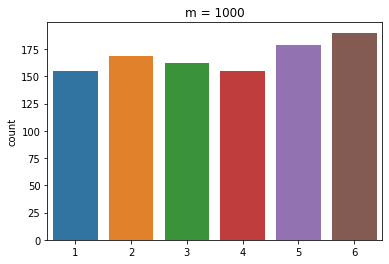

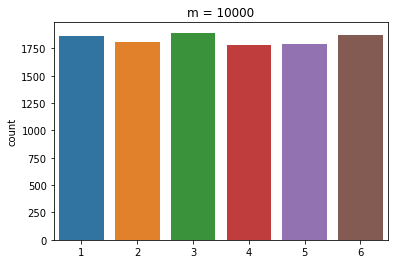

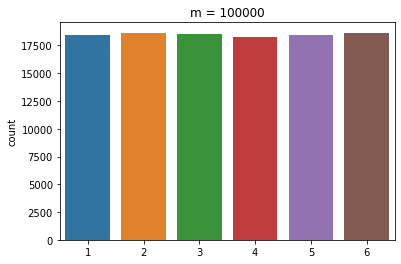

In [9]:
tamanhos_sequencia = [10,1000,10000,100000] #não é inifinito, só um número grande ;) 
faces = []
for tamanho_sequencia in tamanhos_sequencia:
    for i in range(tamanho_sequencia):
        seed = np.random.rand()
        if seed >= 0 and seed < (1/6):
            face = 1
        elif seed >= (1/6) and seed < (2/6):
            face = 2
        elif seed >= (2/6) and seed < (3/6):
            face = 3
        elif seed >= (3/6) and seed < (4/6):
            face = 4
        elif seed >= (4/6) and seed < (5/6):
            face = 5
        elif seed >= (5/6) and seed < (6/6):
            face = 6
        faces.append(face)
    ax = sns.countplot(faces)
    ax.set_title(f"m = {tamanho_sequencia}")
    plt.show()

Como podemos ver, de fato, a probabilidade converge para o valor de 1/6 quando deixamos a sequência maior (indo pro infinito), que é a probabilidade real.

Em algumas situações a abordagem frequentista pode não ser a ideal, por exemplo quando a nossa sequência de dados observados não é grande o suficiente, ou quando queremos transpor um conhecimento "de mundo" para os nossos parâmetros. O paradigma bayesiano vem um pouco nesse sentido. Ele tem como base a ideia de que conforme temos mais dados sobre o que queremos estimar, podemos "atualizar" uma certa crença. Assim, temos uma *crença* a priori e, com os dados, obtemos uma crença *a posteriori*. <br>
Vamos começar com um exemplo meramente ilustrativo e depois podemos trazer os números... <br>
<br>
Você tem um pacote de bolachas na sua mochila numa sala com 5 amigos. Você sai da sala por alguns minutos e quando volta percebe que estão faltando algumas bolachas no pacote. Você sabe a priori que um dos seus amigos gosta mais de bolacha e, portanto, você assume que a probabilidade de ele ter pegado seu doce é maior do que a dos outros. Depois de observar clinicamente a cena do crime, você verifica que esse amigo tem farelos na boca. Não somente, você observa que ele está desviando o olhar e os seus outros amigos riem olhando para ele conforme você pergunta sobre as bolachas. Cada um desses indicios te faz "atualizar" a sua crença a priori de que esse seu amigo comeu seu doce, nesse caso te tornando sua crença "a posteriori" cada vez mais certa de que esse foi o caso.
<br><br>
Mas como exatamente é feito esse mecanismo de atualização? <br>
Ele é baseado na ideia de probabilidades condicionais, ou seja, a probabilidade de alguma coisa dada uma certa outra coisa. Utilizamos para isso uma notação com uma barrinha |, exemplificando: <br>
- Probabilidade de ter câncer de mama dado que se é homem: P(câncer de mama | homem)
- Probabilidade de ser analfabeto dado que se tem 5 anos: P(analfabeto | 5 anos)
- Probabilidade de andar de patinente elétrico mais de duas vezes por semana dado que se trabalha na av. Faria Lima: P(andar de patinete +2x/semana | trabalha na Faria Lima)

## O teorema de Bayes

O teorema de Bayes pode ser enunciado matematicamente da seguinte forma:
$$P(A|B) = \frac{P(A \text{ & } B)}{P(B)}$$
Isso quer dizer que poderíamos saber a probabilidade condicional de A dado B se soubessemos $P(A \text{ & } B)$ e $P(B)$. <br>
Uma propriedade muito útil de probabilidades é que se A e B são eventos independentes, podemos dizer que $P(A \text{ & } B) = P(A) \cdot P(B|A)$, logo conseguimos simplificar a expressão do teorema de Bayes:
$$P(A|B) = \frac{P(A) \cdot P(B|A)}{P(B)}$$ <br>
Esse resultado é bvem simples mas ainda assim muito poderoso. Em geral, o exemplo canônico (que mostra esse poder do teorema de Bayes) é o de testes de doença. <br>
Vamos supor que o teste de HIV tem uma precisão bem alta, de forma que $P(\text{Pessoa testa positivo}|\text{Pessoa tem HIV}) = 95\%$ e especificidade muito alta $P(\text{Pessoa testa negativo} | \text{Pessoa não tem HIV}) = 99\%$. Vamos também supor em que nós estamos numa certa região em que a proporção da populção que tem HIV é 2%, de forma que é plausível supor que $P(\text{HIV}) = 2\%$.
<br>
Logo, temos:
$$P(\text{HIV}| \text{testa positivo}) = \frac{P(\text{testa positivo})|\text{HIV}) \cdot P(\text{HIV})}{P(\text{testa positivo})}$$

Temos a maioria das probabilidades, apenas precisamos calcular $P(\text{testa positivo})$. Ela pode ser obtida da seguinte forma:

$$P(\text{testa positivo}) = P(\text{testa positivo}|\text{HIV}) \cdot P(\text{HIV}) + P(\text{testa positivo}| \text{sem HIV}) \cdot P(\text{sem HIV})$$
<br>
$$P(\text{testa positivo}) = 0.95 \cdot 0.03 + 0.01 \cdot 0.98 = 0.0383 = 3.83\%$$

$$P(\text{HIV}| \text{testa positivo}) = \frac{0.99 \cdot 0.03}{0.0383} = 77.55 \%$$

Por mais que esse número seja alto, ele ainda é bem menor do que o 99%, sou seja, se você testar positivo num teste que tem 99% de sensitividade não quer dizer que a chance de você ter a doença seja de 99%. De fato, quanto menor for a prevalência da doença na populção, menor essa chance $P(\text{ter doença}| \text{testar positivo})$ se torna. Por isso não faz sentido testar em massa populções para doenças raras.

Todo esse insight vem exatamente do Teorema de Bayes. 

## Atualização de Bayes

Como acabamos de ver, o teorema de Bayes (no caso em que A e B são eventos independentes) segue a formulação:
$$P(A|B) = \frac{P(A) \cdot P(B|A)}{P(B)}$$ 

Mas o mais interessante é fazer uma pequena, mas importante, mudança na apresentação dessa fórmula:
$$P(A|B) = P(A) \frac{P(B|A)}{P(B)}$$ 

Essa pequena mudança despretenciosa na apresentação da fórmula, evidencia alguns conceitos muito importantes de estatística Bayesiana. 
 - P(A) é o nossa crença a priori. Ela pode não ser muito rígida para se formular. No caso do HIV, assumimos que o *prior* era a taxa base de HIV na população. Mas vamos supor que alguem testa positivo e, sabendo que a sua real chance de ter HIV é de 77.55%, resolve se testar de novo. Nesse caso, o nosso prior não seria mais a taxa básica da população, mas sim o nosso 77.55%, que representa a nossa crença P(HIV).
 
 - No caso do HIV, nós partimos de um *prior* de 3% para um de 77.55%. Para atualizar essa crença, nós utilizamos o teorema de Bayes e *atualizamos* a nossa crença

## Fator de Bayes

## Inferência Bayesiana

## Rede Bayesiana (Bayesian network)